In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

!pip install xgboost
import xgboost as xgb

!pip install shap
import shap

shap.initjs()

df = pd.read_csv('dataset.csv')

In [2]:
df

,STUDENT ID,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,STUDENT141,2,1,2,3,1,1,2,1,1,...,1,1,2,1,2,1,3,3,9,5
141,STUDENT142,1,1,2,4,2,2,2,1,4,...,1,1,3,2,2,1,5,3,9,5
142,STUDENT143,1,1,1,4,2,2,2,1,1,...,1,1,3,3,2,1,4,3,9,1
143,STUDENT144,2,1,2,4,1,1,1,5,2,...,2,1,2,1,2,1,5,3,9,4


In [3]:
df = df.drop(['STUDENT ID'], axis=1)
df

,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,COURSE ID,GRADE
0,2,2,3,3,1,2,2,1,1,1,...,1,1,3,2,1,2,1,1,1,1
1,2,2,3,3,1,2,2,1,1,1,...,1,1,3,2,3,2,2,3,1,1
2,2,2,2,3,2,2,2,2,4,2,...,1,1,2,2,1,1,2,2,1,1
3,1,1,1,3,1,2,1,2,1,2,...,1,2,3,2,2,1,3,2,1,1
4,2,2,1,3,2,2,1,3,1,4,...,2,1,2,2,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,2,1,2,3,1,1,2,1,1,2,...,1,1,2,1,2,1,3,3,9,5
141,1,1,2,4,2,2,2,1,4,2,...,1,1,3,2,2,1,5,3,9,5
142,1,1,1,4,2,2,2,1,1,1,...,1,1,3,3,2,1,4,3,9,1
143,2,1,2,4,1,1,1,5,2,3,...,2,1,2,1,2,1,5,3,9,4


In [4]:
# 1. Create df_pass_fail
df_pass_fail = df.copy()
df_pass_fail['GRADE'] = df_pass_fail['GRADE'].apply(lambda x: 0 if x == 0 else 1)
df_pass_fail

,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,COURSE ID,GRADE
0,2,2,3,3,1,2,2,1,1,1,...,1,1,3,2,1,2,1,1,1,1
1,2,2,3,3,1,2,2,1,1,1,...,1,1,3,2,3,2,2,3,1,1
2,2,2,2,3,2,2,2,2,4,2,...,1,1,2,2,1,1,2,2,1,1
3,1,1,1,3,1,2,1,2,1,2,...,1,2,3,2,2,1,3,2,1,1
4,2,2,1,3,2,2,1,3,1,4,...,2,1,2,2,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,2,1,2,3,1,1,2,1,1,2,...,1,1,2,1,2,1,3,3,9,1
141,1,1,2,4,2,2,2,1,4,2,...,1,1,3,2,2,1,5,3,9,1
142,1,1,1,4,2,2,2,1,1,1,...,1,1,3,3,2,1,4,3,9,1
143,2,1,2,4,1,1,1,5,2,3,...,2,1,2,1,2,1,5,3,9,1


In [5]:
# 2. Create df_good_students
df_good_students = df.copy()
df_good_students['GRADE'] = df_good_students['GRADE'].apply(lambda x: 0 if x <= 4 else 1)
df_good_students

,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,COURSE ID,GRADE
0,2,2,3,3,1,2,2,1,1,1,...,1,1,3,2,1,2,1,1,1,0
1,2,2,3,3,1,2,2,1,1,1,...,1,1,3,2,3,2,2,3,1,0
2,2,2,2,3,2,2,2,2,4,2,...,1,1,2,2,1,1,2,2,1,0
3,1,1,1,3,1,2,1,2,1,2,...,1,2,3,2,2,1,3,2,1,0
4,2,2,1,3,2,2,1,3,1,4,...,2,1,2,2,2,1,2,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,2,1,2,3,1,1,2,1,1,2,...,1,1,2,1,2,1,3,3,9,1
141,1,1,2,4,2,2,2,1,4,2,...,1,1,3,2,2,1,5,3,9,1
142,1,1,1,4,2,2,2,1,1,1,...,1,1,3,3,2,1,4,3,9,0
143,2,1,2,4,1,1,1,5,2,3,...,2,1,2,1,2,1,5,3,9,0


In [6]:
# 3. Create course-specific DataFrames for pass/fail and good students
for course_id in range(1, 10):
    # Filter DataFrame for the specific course
    course_df = df[df['COURSE ID'] == course_id]
    course_df = course_df.drop(['COURSE ID'], axis=1)

    # Create pass/fail DataFrame for the course
    course_pass_fail = course_df.copy()
    course_pass_fail['GRADE'] = course_pass_fail['GRADE'].apply(lambda x: 0 if x == 0 else 1)
    globals()[f'df_{course_id}_pass_fail'] = course_pass_fail

    # Create good students DataFrame for the course
    course_good_students = course_df.copy()
    course_good_students['GRADE'] = course_good_students['GRADE'].apply(lambda x: 0 if x <= 4 else 1)
    globals()[f'df_{course_id}_good_students'] = course_good_students

In [7]:
df_1_pass_fail

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,GRADE
0,2,2,3,3,1,2,2,1,1,1,...,1,1,1,3,2,1,2,1,1,1
1,2,2,3,3,1,2,2,1,1,1,...,1,1,1,3,2,3,2,2,3,1
2,2,2,2,3,2,2,2,2,4,2,...,1,1,1,2,2,1,1,2,2,1
3,1,1,1,3,1,2,1,2,1,2,...,1,1,2,3,2,2,1,3,2,1
4,2,2,1,3,2,2,1,3,1,4,...,1,2,1,2,2,2,1,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,1,2,3,3,2,1,2,2,1,2,...,2,1,1,3,2,2,2,4,4,1
62,2,2,2,3,2,2,2,1,4,2,...,1,1,1,2,3,3,2,5,4,1
63,2,2,2,4,2,2,1,2,1,1,...,1,3,1,2,2,2,1,3,3,1
64,2,2,3,5,2,2,2,1,1,1,...,1,2,1,3,2,3,1,4,3,1


In [8]:
df_1_good_students

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,GRADE
0,2,2,3,3,1,2,2,1,1,1,...,1,1,1,3,2,1,2,1,1,0
1,2,2,3,3,1,2,2,1,1,1,...,1,1,1,3,2,3,2,2,3,0
2,2,2,2,3,2,2,2,2,4,2,...,1,1,1,2,2,1,1,2,2,0
3,1,1,1,3,1,2,1,2,1,2,...,1,1,2,3,2,2,1,3,2,0
4,2,2,1,3,2,2,1,3,1,4,...,1,2,1,2,2,2,1,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,1,2,3,3,2,1,2,2,1,2,...,2,1,1,3,2,2,2,4,4,1
62,2,2,2,3,2,2,2,1,4,2,...,1,1,1,2,3,3,2,5,4,0
63,2,2,2,4,2,2,1,2,1,1,...,1,3,1,2,2,2,1,3,3,1
64,2,2,3,5,2,2,2,1,1,1,...,1,2,1,3,2,3,1,4,3,0


In [9]:
# Plot Correlation Heatmap
def plotCorrHeatmap(dfv):
    plt.figure(figsize=(30,30))
    sns.heatmap(dfv.corr(), annot=True, cmap="Reds")
    plt.title('Correlation Heatmap', fontsize=20)

# Plot Feature Correlation
def plotFeatureCorr(dfv):
    plt.figure(figsize=(8, 12))
    heatmap = sns.heatmap(dfv.corr()[['GRADE']].sort_values(by='GRADE', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
    heatmap.set_title('Features Correlating with the grade of student', fontdict={'fontsize':18}, pad=16);

# Plot SHAP Analysis Result
def plotSHAP(dfv):
    X = dfv.drop(['GRADE'], axis=1)
    y = dfv['GRADE']
    model = xgb.XGBClassifier(objective="binary:logistic")
    model.fit(X, y)
    explainer = shap.Explainer(model)
    shap_values = explainer(X)
    shap.plots.bar(shap_values)

In [10]:
# Getting top features
def get_top_features(dfv):
    X = dfv.drop(['GRADE'], axis=1)
    y = dfv['GRADE']

    # Train the model
    model = xgb.XGBClassifier(objective="binary:logistic")
    model.fit(X, y)

    # Calculate SHAP values
    explainer = shap.Explainer(model)
    shap_values = explainer(X)

    # Mean SHAP values for each feature
    mean_shap_values = shap_values.abs.mean(0)

    # Combine feature names and their mean SHAP values
    feature_importance = list(zip(X.columns, mean_shap_values.values))

    # Get the top 12 features
    sorted_features = sorted(feature_importance, key=lambda x: x[1], reverse=True)
    top_features = [feature for feature, _ in sorted_features[:12]]
    top_features.append('GRADE')

    return top_features

In [11]:
def testAccuracy(X, y):
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Preprocessing pipeline
    numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
    categorical_features = X.select_dtypes(include=['object']).columns
    
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_features),
            ('cat', OneHotEncoder(), categorical_features)
        ]
    )
    
    # Models to evaluate
    models = {
        'Logistic Regression': LogisticRegression(max_iter=500),
        'Decision Tree': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier(),
        'Gradient Boosting': GradientBoostingClassifier(),
        'SVM': SVC(),
        'Neural Network': MLPClassifier(max_iter=500)
    }
    
    # Evaluate each model
    best_model = None
    best_score = 0
    results = {}
    
    for name, model in models.items():
        pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                    ('classifier', model)])
        scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
        avg_score = np.mean(scores)
        results[name] = avg_score
        print(f"{name}: {avg_score:.4f}")
        if avg_score > best_score:
            best_score = avg_score
            best_model = name
    
    # Train the best model on the full training set and evaluate on the test set
    final_model = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('classifier', models[best_model])])
    final_model.fit(X_train, y_train)
    y_pred = final_model.predict(X_test)
    
    # Output the best model and classification report
    print("\nBest Model:")
    print(f"{best_model} with accuracy {best_score:.4f}")

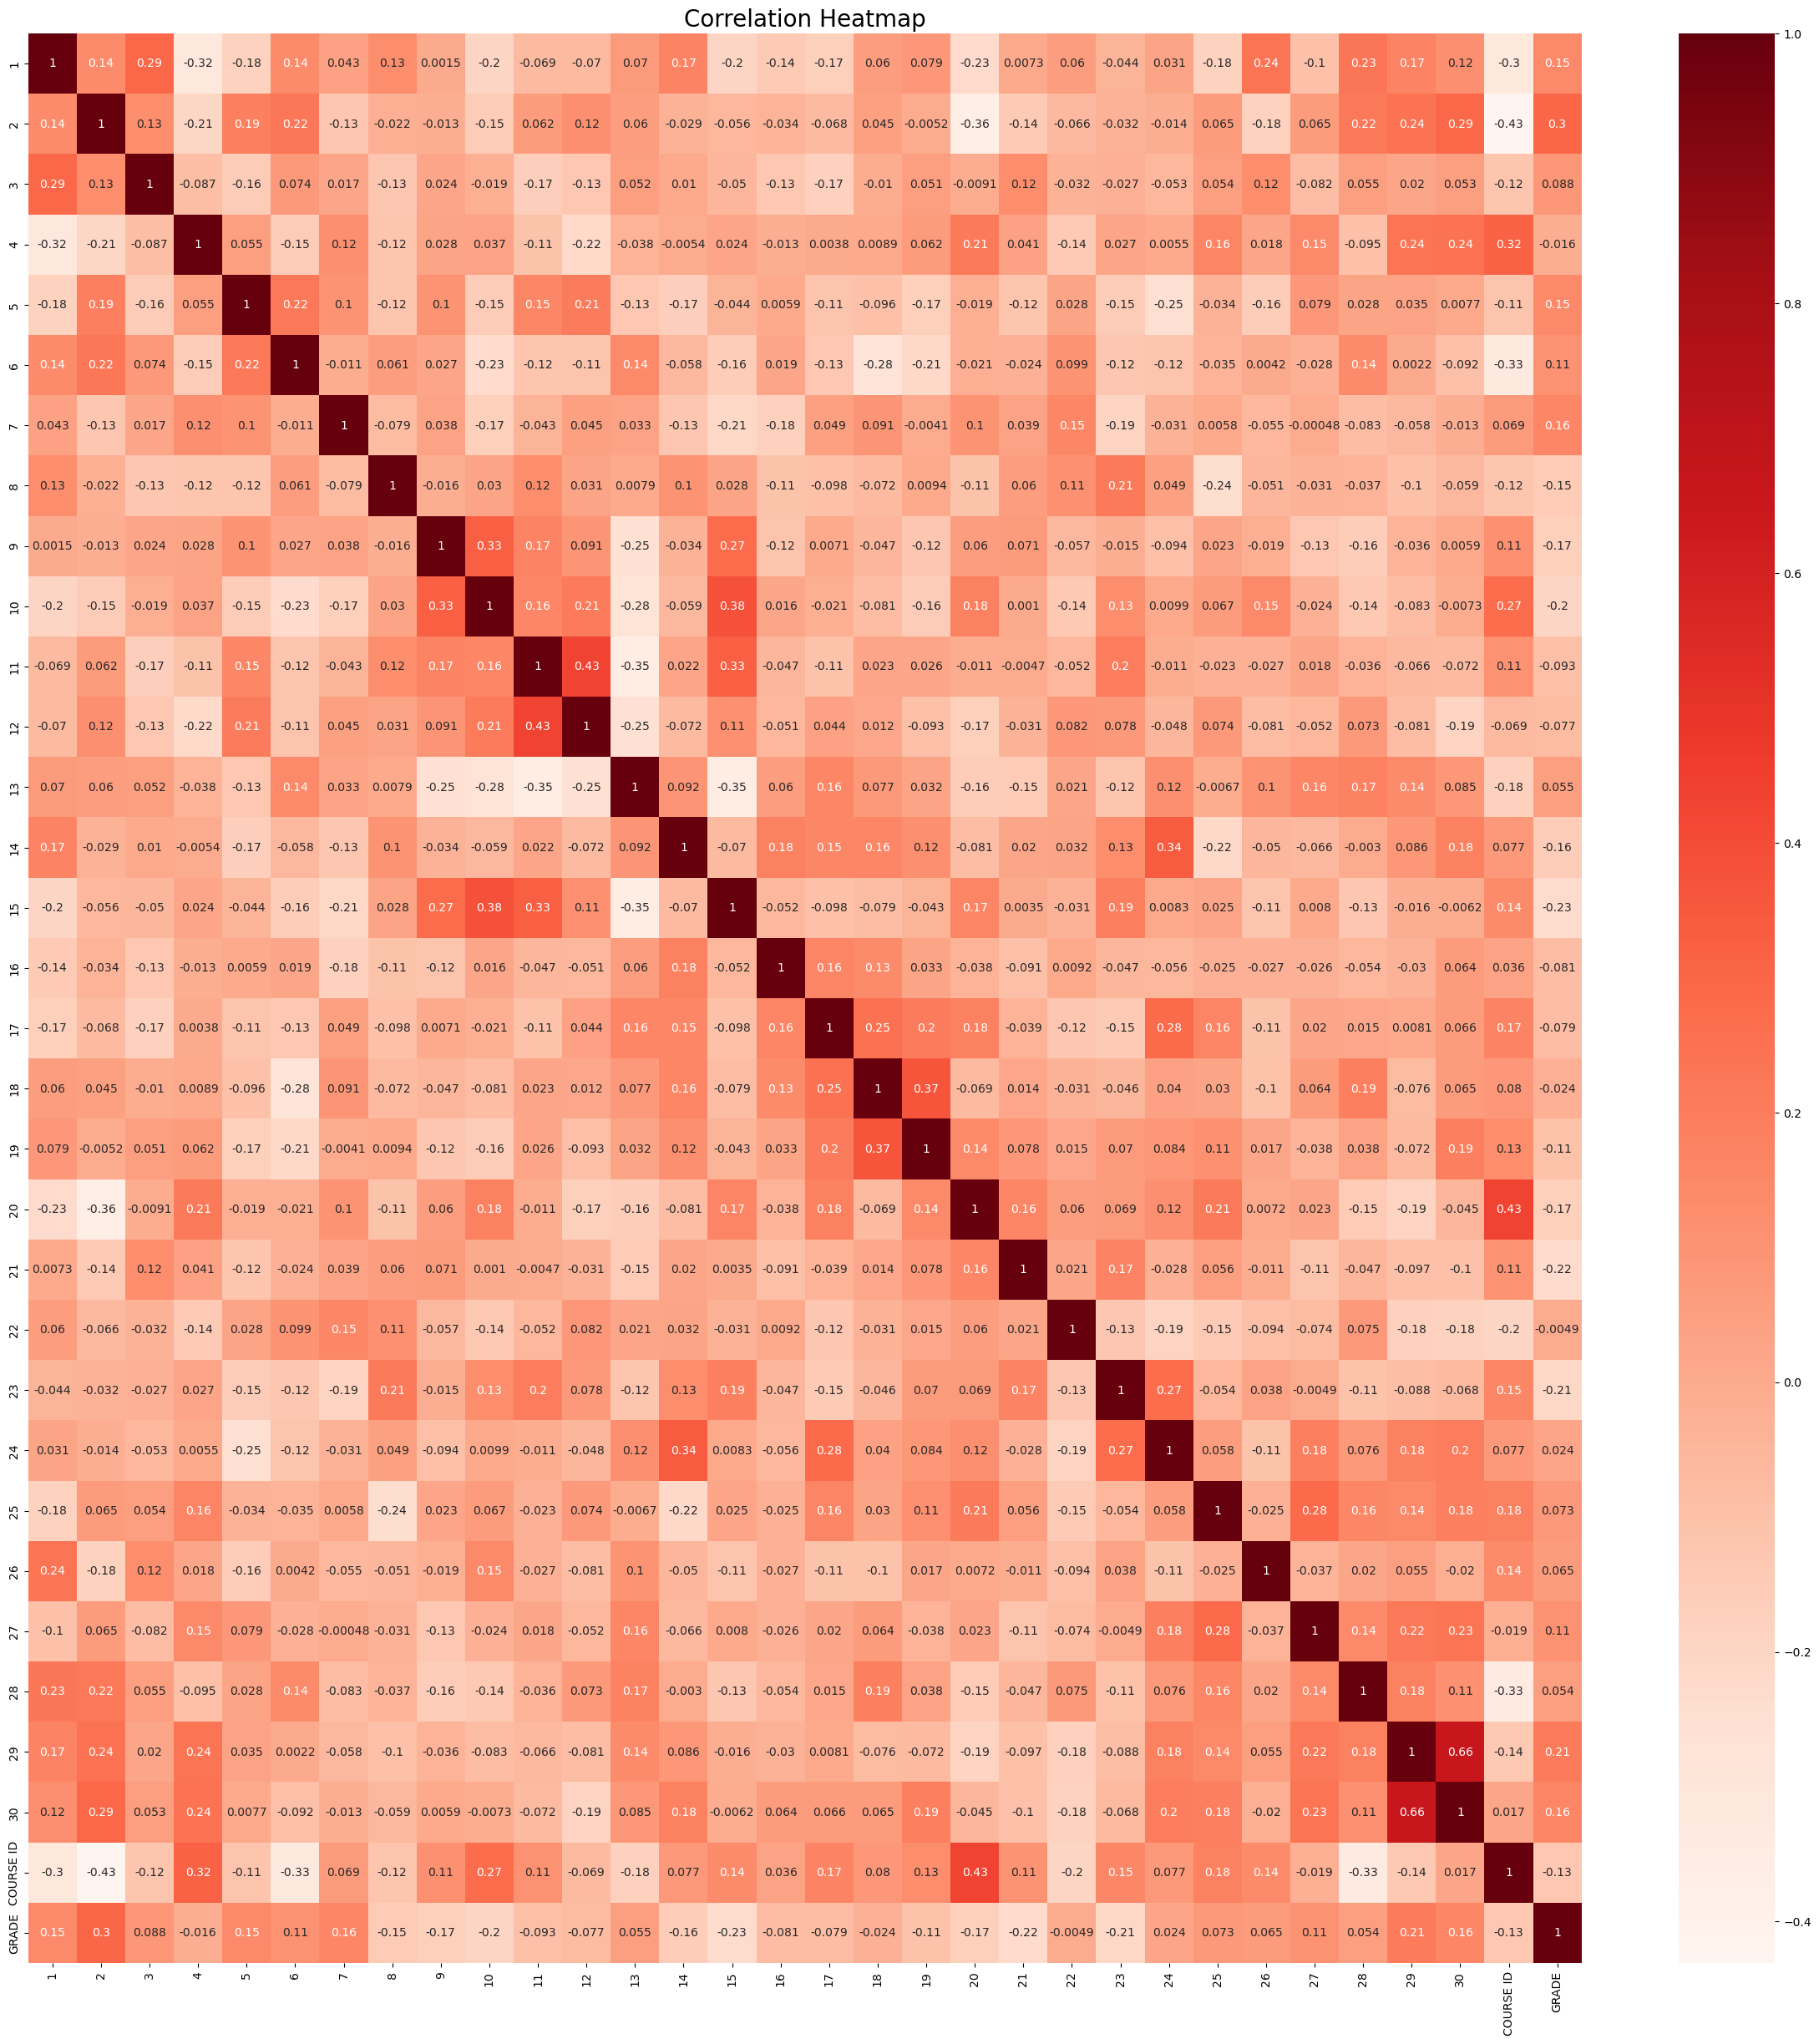

In [12]:
# Analyse df_pass_fail
plotCorrHeatmap(df_pass_fail)

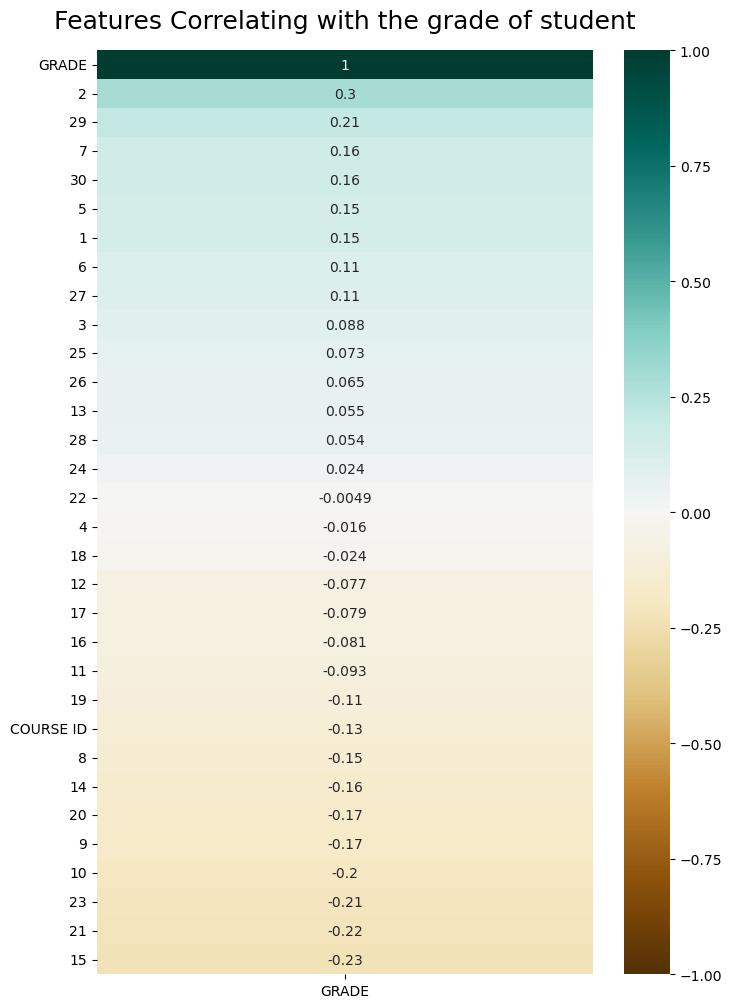

In [13]:
plotFeatureCorr(df_pass_fail)

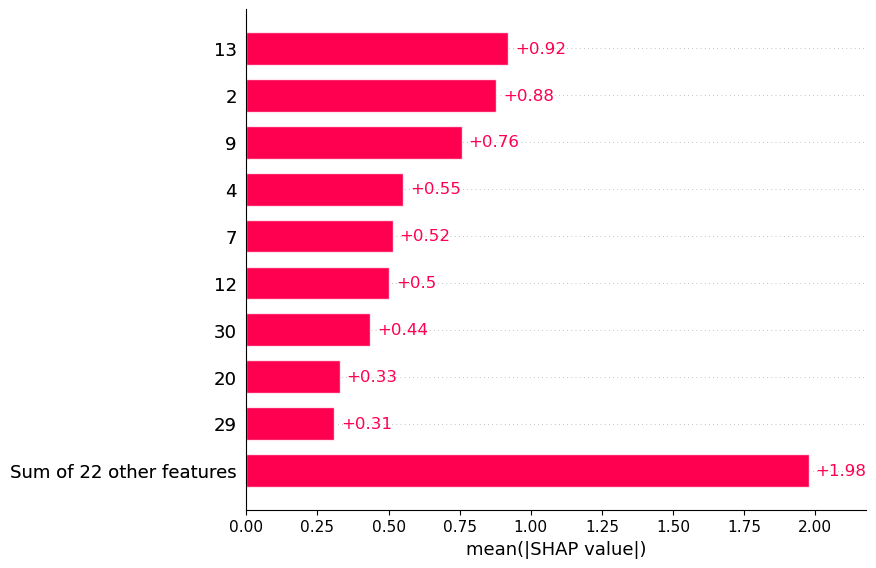

In [14]:
plotSHAP(df_pass_fail)

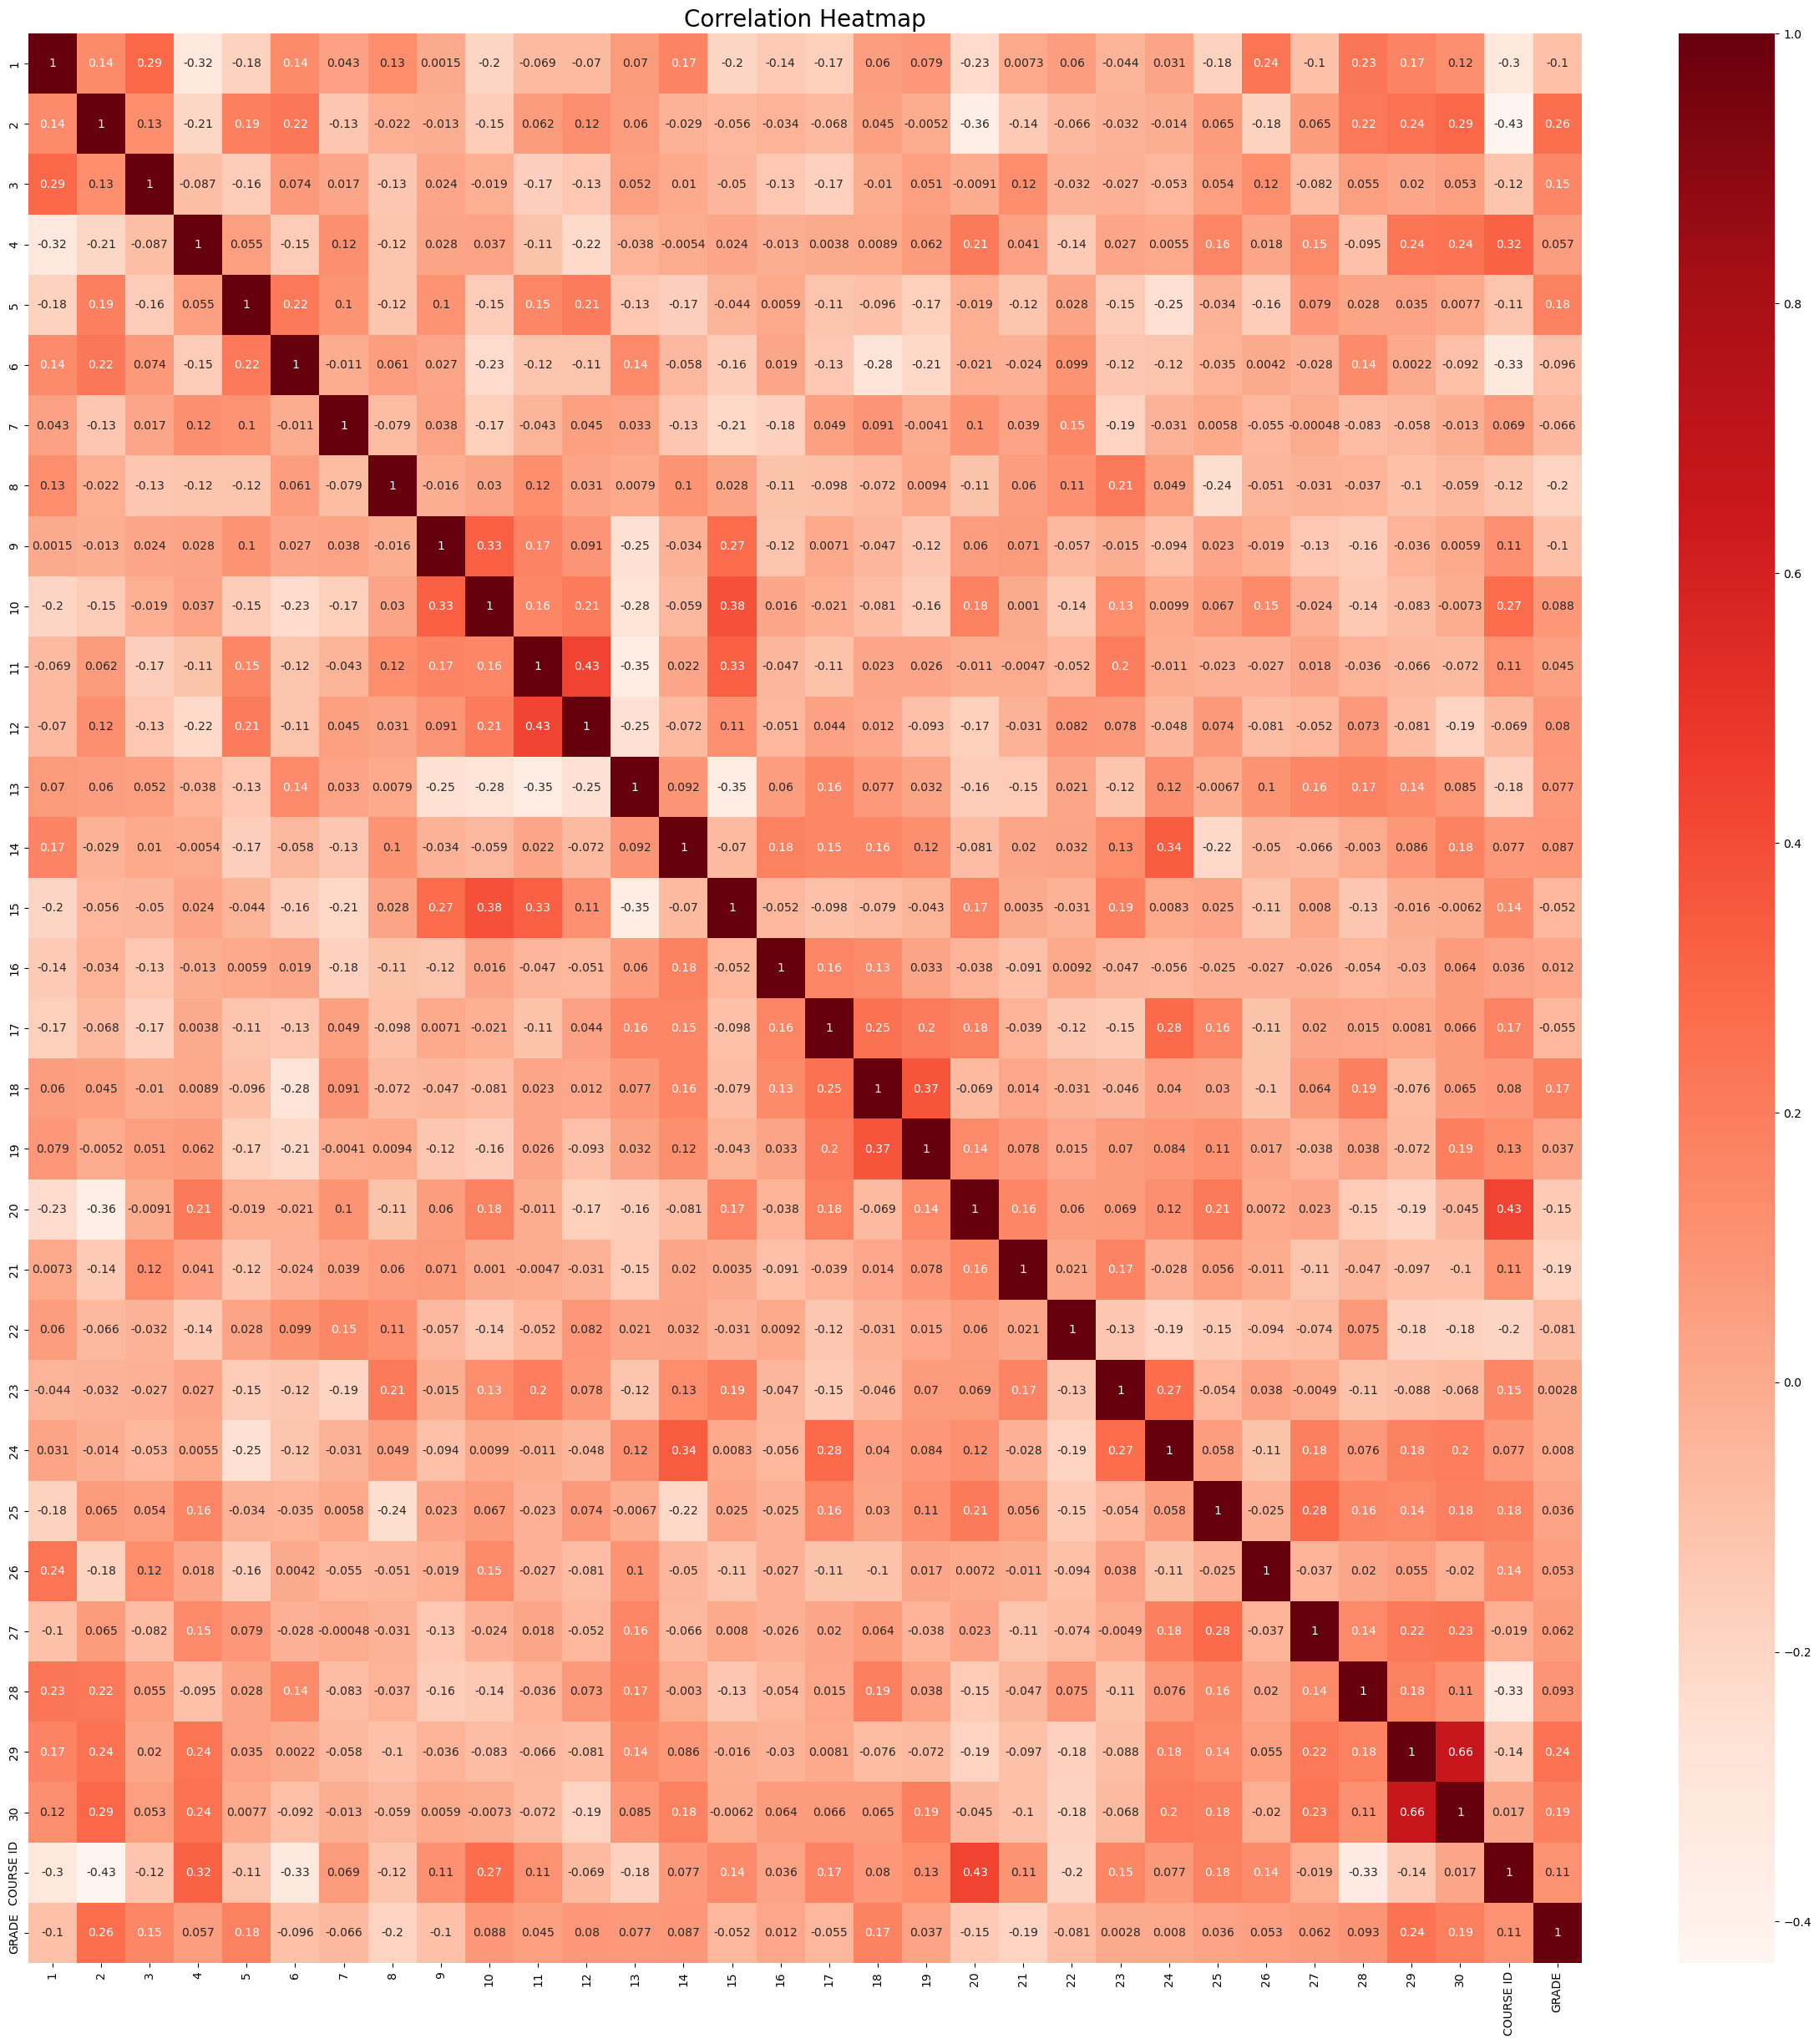

In [15]:
# Analyse df_good_students
plotCorrHeatmap(df_good_students)

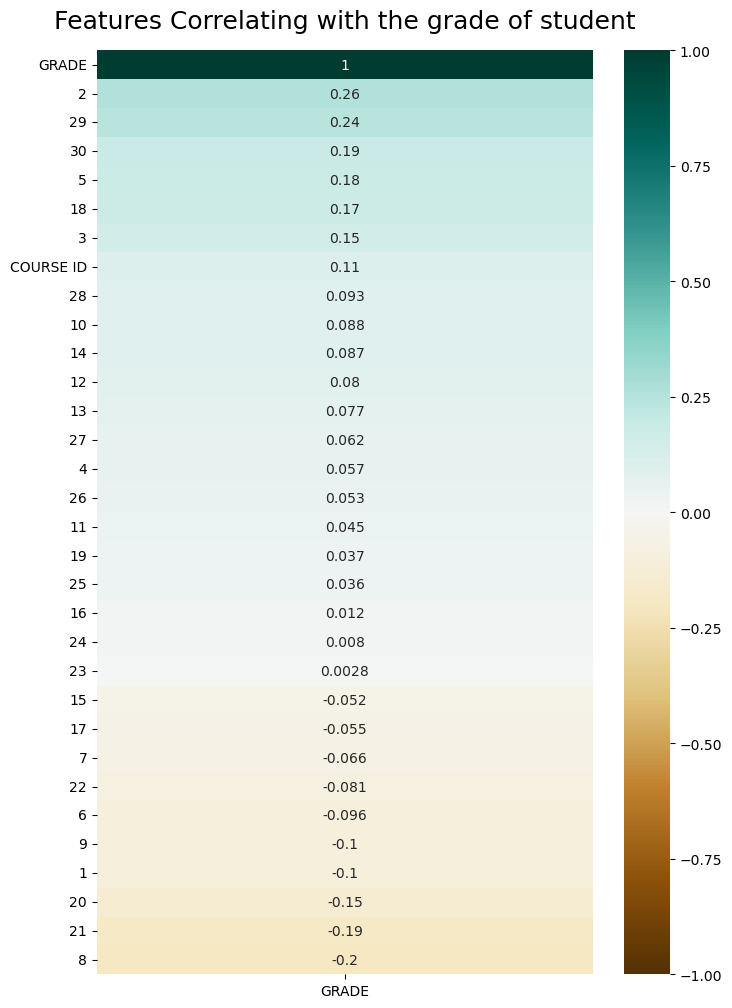

In [16]:
plotFeatureCorr(df_good_students)

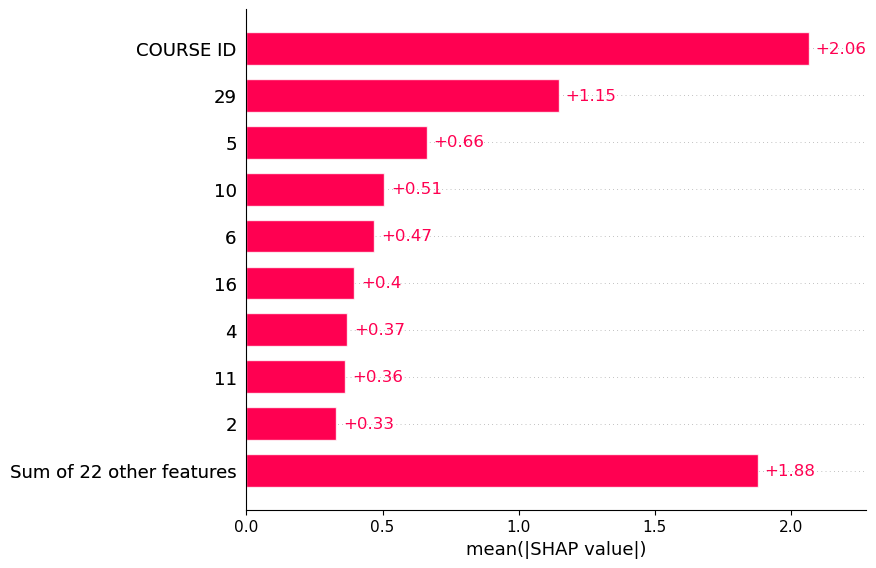

In [17]:
plotSHAP(df_good_students)

In [18]:
# Test using all features
X = df.drop('GRADE', axis=1)
y = df['GRADE']
testAccuracy(X, y)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Logistic Regression: 0.2764
Decision Tree: 0.3192
Random Forest: 0.3196


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Gradient Boosting: 0.3623
SVM: 0.2670


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Neural Network: 0.3283

Best Model:
Gradient Boosting with accuracy 0.3623


In [19]:
# Test using pass fail features
selected_features = get_top_features(df_pass_fail)
dff = df[selected_features]
X = dff.drop('GRADE', axis=1)
y = dff['GRADE']
testAccuracy(X, y)

Logistic Regression: 0.3022
Decision Tree: 0.3630


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Random Forest: 0.3362


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Gradient Boosting: 0.3620
SVM: 0.3359


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Network: 0.2591

Best Model:
Decision Tree with accuracy 0.3630


/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [20]:
# Test using good students features
selected_features = get_top_features(df_good_students)
dff = df[selected_features]
X = dff.drop('GRADE', axis=1)
y = dff['GRADE']
testAccuracy(X, y)

Logistic Regression: 0.3109
Decision Tree: 0.2844


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Random Forest: 0.3272


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Gradient Boosting: 0.4232
SVM: 0.3616


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maxi

Neural Network: 0.3196

Best Model:
Gradient Boosting with accuracy 0.4232


In [21]:
# Test using pass fail features, Converted Grades
selected_features = get_top_features(df_pass_fail)
df_pass_fail_selected_features = df_pass_fail[selected_features]
X = df_pass_fail_selected_features.drop('GRADE', axis=1)
y = df_pass_fail_selected_features['GRADE']
testAccuracy(X, y)

Logistic Regression: 0.9656
Decision Tree: 0.9576


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Random Forest: 0.9743
Gradient Boosting: 0.9576
SVM: 0.9656


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Neural Network: 0.9656

Best Model:
Random Forest with accuracy 0.9743


In [22]:
# Test using good students features, Converted Grades
selected_features = get_top_features(df_good_students)
df_good_students_selected_features = df_good_students[selected_features]
X = df_good_students_selected_features.drop('GRADE', axis=1)
y = df_good_students_selected_features['GRADE']
testAccuracy(X, y)

Logistic Regression: 0.6554
Decision Tree: 0.6551
Random Forest: 0.7493
Gradient Boosting: 0.8007
SVM: 0.6986


/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Network: 0.7500

Best Model:
Gradient Boosting with accuracy 0.8007


In [51]:
print('Top features of course 1')
print(get_top_features(df_1_pass_fail))
print(get_top_features(df_1_good_students))

Top features of course 1
['2', '8', '9', '29', '28', '12', '17', '30', '25', '3', '10', '7', 'GRADE']
['11', '6', '4', '29', '5', '13', '10', '27', '16', '8', '28', '1', 'GRADE']


In [73]:
print('Top features of course 8')
print(get_top_features(df_8_pass_fail))
print(get_top_features(df_8_good_students))

Top features of course 8
['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', 'GRADE']
['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', 'GRADE']


In [77]:
print('Top features of course 9')
print(get_top_features(df_9_pass_fail))
print(get_top_features(df_9_good_students))

Top features of course 9
['7', '16', '15', '17', '29', '30', '1', '2', '3', '4', '5', '6', 'GRADE']
['11', '27', '29', '17', '1', '2', '3', '4', '5', '6', '7', '8', 'GRADE']
